In [ ]:
# Description: This program predicts the price of FB stock for a particular day

In [ ]:
# miport the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data.
from google.colab import files
uploaded = files.upload()

In [ ]:
# Store the data
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
# Get the number of rows and columns
df.shape

(1235, 8)

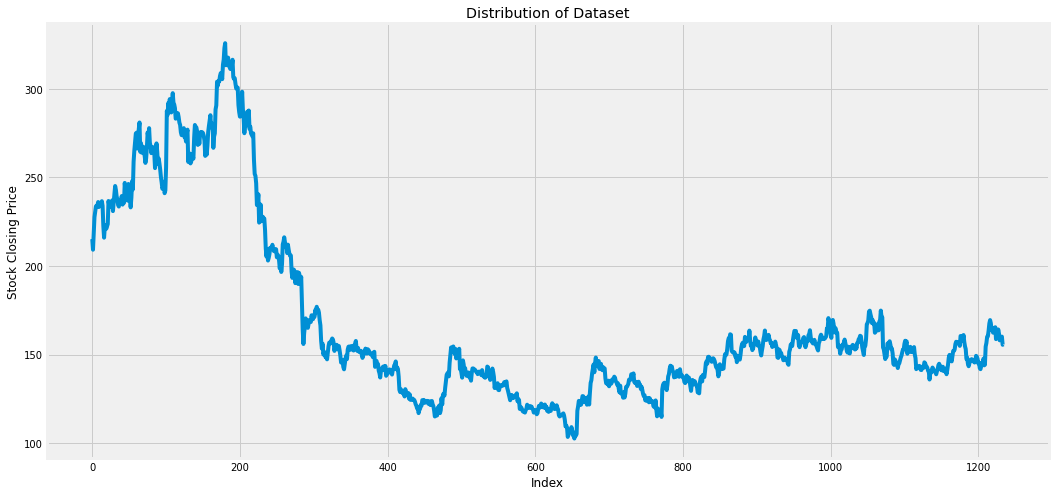

In [ ]:
# Plotting the data points on the graph
plt.figure(figsize=(16,8))
plt.ylabel("Stock Closing Price")
plt.xlabel("Index")
plt.title("Distribution of Dataset")
plt.plot(df['Close'], label='Close Price History')
plt.savefig("1.jpg")

In [ ]:
# Rearranging the data point into asscending order
data = df.sort_index(ascending=True, axis=0)

In [ ]:
# Creating a seperate Dataset

new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(df)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

In [ ]:
new_data.head()

,Date,Close
0,2018-10-08,215.15
1,2018-10-05,209.2
2,2018-10-04,218.2
3,2018-10-03,227.6
4,2018-10-01,230.9


In [ ]:
from fastai.tabular import add_datepart

In [ ]:
add_datepart(new_data, "Date")
new_data.drop("Elapsed", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,215.15,2018,10,41,8,0,281,False,False,False,False,False,False
1,209.2,2018,10,40,5,4,278,False,False,False,False,False,False
2,218.2,2018,10,40,4,3,277,False,False,False,False,False,False
3,227.6,2018,10,40,3,2,276,False,False,False,False,False,False
4,230.9,2018,10,40,1,0,274,False,True,False,True,False,False


In [ ]:
new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
  if new_data['Dayofweek'][i]==0 or new_data['Dayofweek'][i]==4:
    new_data['mon_fri'][i] = 1
  else:
    new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,215.15,2018,10,41,8,0,281,False,False,False,False,False,False,1
1,209.2,2018,10,40,5,4,278,False,False,False,False,False,False,1
2,218.2,2018,10,40,4,3,277,False,False,False,False,False,False,0
3,227.6,2018,10,40,3,2,276,False,False,False,False,False,False,0
4,230.9,2018,10,40,1,0,274,False,True,False,True,False,False,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data
X = new_data.iloc[:, 1:]
y = new_data.iloc[:, 0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# implement linear regression
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

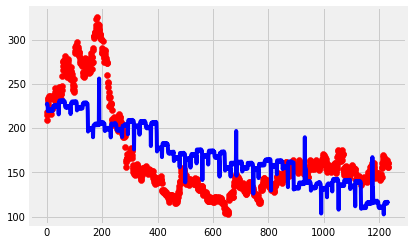

In [ ]:
plt.scatter(y.index, y, color='red')
plt.plot(y.index, lin_model.predict(X), color='blue')

In [ ]:
# Make predictions and find the rmse
preds = lin_model.predict(X_test)

rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(preds)), 2)))
rms

39.86275882251892

In [ ]:
lin_model.score(X_test, y_test)

0.3734600900256504

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)

In [ ]:
svr_rbf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

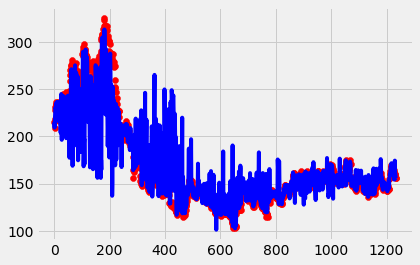

In [ ]:
plt.scatter(y.index, y, color='red')
plt.plot(y.index, svr_rbf.predict(X), color='blue')

In [ ]:
svr_rbf.score(X_test, y_test)

0.26653918085719797

In [ ]:
model = SVR(kernel='rbf', C=0.1, gamma=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y, cmap=plt.cm.coolwarm)

In [ ]:
svr_model.score(X_test, y_test)          # Kernel: Linear

0.2671293495717032

In [ ]:
# Make predictions using SVR model

predSVR = svr_model.predict(X_test)

rmsSVR = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(predSVR)), 2)))
rmsSVR

52.21172177947113

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred_tree = tree_model.predict(X_test)

rmsTree = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(pred_tree)), 2)))
rmsTree

71.41684193114858